# Heart Attack Triggers

`by Nyanda Redwood | November 20, 2022`

# Introduction

According to the [Government of Canada](https://www.canada.ca/en/public-health/services/publications/diseases-conditions/heart-disease-canada.html):
- every hour, about 14 Canadian adults age 20 and over with diagnosed heart disease die.

This makes heart disease, and in this specific case, heart attacks an important issue with which to treat.

The present project works with a sample of real world publicly available health data pertaining to heart attacks in order to explore a predictive model for heart attacks. This model employs various health metrics.

## Importing Libraries before Commencing

Before we delve into the data we will import libraries that we will work with at the start.

In [1]:
# Import libraries needed for this analysis.
import altair as alt
import numpy as np
import pandas as pd
import string
from sklearn import tree
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import (
    FunctionTransformer,
    Normalizer,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    normalize,
    scale,
    )
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.svm import SVC, SVR
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

## Exploratoy Data Analysis (EDA)
We begin our EDA by importing our dataset.

In [2]:
# Read in the table Dataset_DSChallenge.csv and save it as awake_df
awake_df = pd.read_csv("Dataset_DSChallenge.csv")

Now, let's take a look at our dataset.

In [3]:
# let's look at the first couple rows of our data
awake_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2Saturation
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,98.6
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,98.6
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,98.6
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,98.6
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,98.1


The feature names are not readily understood so we will change these so that they are.

In [4]:
# let's clean our feature names so that we understand them
awake_df = awake_df.rename(columns={'cp': 'chest_pain', 'trtbps': 'Rblood_pressure',
                                   'chol': 'cholesterol', 'fbs': 'Fblood_sugar', 'restecg': 'Rest_ECG',
                                   'thalachh': 'Max_heart_rate', 'exng': 'exercize_angina',
                                   'slp': 'slope', 'caa': 'major_vessels', 'thall': 'TStress_result',
                                   'output': 'Heart_attack', 'o2Saturation':'Blood_oxygen'})
awake_df.head()

,age,sex,chest_pain,Rblood_pressure,cholesterol,Fblood_sugar,Rest_ECG,Max_heart_rate,exercize_angina,oldpeak,slope,major_vessels,TStress_result,Heart_attack,Blood_oxygen
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,98.6
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,98.6
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,98.6
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,98.6
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,98.1


Now we can clearly read and understand the 15 features:
- `age`
- `sex`
- `chest_pain`
- `Rblood_pressure`
- `cholesterol`
- `Fblood_sugar`
- `Rest_ECG`
- `Max_heart_rate`
- `exercize_angina`
- `oldpeak`
- `slope`
- `major_vessels`
- `TStress_result`
- `Blood_oxygen`

Let's take a closer look at these features.

In [5]:
# Use .info() to find out more about our dataset.
awake_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              303 non-null    float64
 1   sex              303 non-null    float64
 2   chest_pain       303 non-null    float64
 3   Rblood_pressure  303 non-null    float64
 4   cholesterol      303 non-null    float64
 5   Fblood_sugar     303 non-null    float64
 6   Rest_ECG         303 non-null    float64
 7   Max_heart_rate   303 non-null    float64
 8   exercize_angina  303 non-null    float64
 9   oldpeak          303 non-null    float64
 10  slope            303 non-null    float64
 11  major_vessels    303 non-null    float64
 12  TStress_result   303 non-null    float64
 13  Heart_attack     303 non-null    float64
 14  Blood_oxygen     3586 non-null   float64
dtypes: float64(15)
memory usage: 420.4 KB


Of the 15 features within our dataset, the target feature is `Heart_attack`. 14 features have 303 values, and noticeably the feature `Blood_oxygen` has 3586 values. A close examination reveals that our dataset is only complete for the first 303 entries. This explains the discrepancy between the feature `Blood_oxygen` and all other features. We will remove rows with null values, NaN.

In [6]:
# Remove NaN values in our target feature, Heart_attack.
awake_df = awake_df.dropna(subset=["Heart_attack"])
awake_df.head()

,age,sex,chest_pain,Rblood_pressure,cholesterol,Fblood_sugar,Rest_ECG,Max_heart_rate,exercize_angina,oldpeak,slope,major_vessels,TStress_result,Heart_attack,Blood_oxygen
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,98.6
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,98.6
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,98.6
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,98.6
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,98.1


In [7]:
# Verify that our NaN are removed
awake_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              303 non-null    float64
 1   sex              303 non-null    float64
 2   chest_pain       303 non-null    float64
 3   Rblood_pressure  303 non-null    float64
 4   cholesterol      303 non-null    float64
 5   Fblood_sugar     303 non-null    float64
 6   Rest_ECG         303 non-null    float64
 7   Max_heart_rate   303 non-null    float64
 8   exercize_angina  303 non-null    float64
 9   oldpeak          303 non-null    float64
 10  slope            303 non-null    float64
 11  major_vessels    303 non-null    float64
 12  TStress_result   303 non-null    float64
 13  Heart_attack     303 non-null    float64
 14  Blood_oxygen     303 non-null    float64
dtypes: float64(15)
memory usage: 37.9 KB


Above we see that our data is now cleaned of all null values. Let's now correct the data types of the categorical features from float64.

In [8]:
# Change the dtypes of categorical variables from float64
for col in ['sex', 'chest_pain', 'Fblood_sugar', 'Rest_ECG', 'exercize_angina', 'slope', 'TStress_result']:
    awake_df[col] = awake_df[col].astype('category')

In [9]:
awake_df.dtypes

age                 float64
sex                category
chest_pain         category
Rblood_pressure     float64
cholesterol         float64
Fblood_sugar       category
Rest_ECG           category
Max_heart_rate      float64
exercize_angina    category
oldpeak             float64
slope              category
major_vessels       float64
TStress_result     category
Heart_attack        float64
Blood_oxygen        float64
dtype: object

Let's find out some quick statistic information on our features such as minimum, maximum, and mean values

In [10]:
# Use .describe() to find out more the statistic summary of our dataset
awake_df.describe()

,age,Rblood_pressure,cholesterol,Max_heart_rate,oldpeak,major_vessels,Heart_attack,Blood_oxygen
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373,0.544554,97.484488
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606,0.498835,0.352649
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000,96.500000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000,97.500000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000,1.000000,97.500000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000,1.000000,97.500000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000,1.000000,98.600000


Above we can readily see some quick statistics on the dataset such as mean, minimum and maximum values. For instance, the mean age is around 54, the mean oxygen saturation in the blood is around 97. The youngest person is 29 and the oldest is 77, the lowest heart rate is 71 and the highest is 202, and the lowest level of oxygen saturation in the blood is 96.5; the highest level is 98.6.

## EDA Visualizations
Let's take a look at what relationship there may be among our features by plotting a couple different graphs.

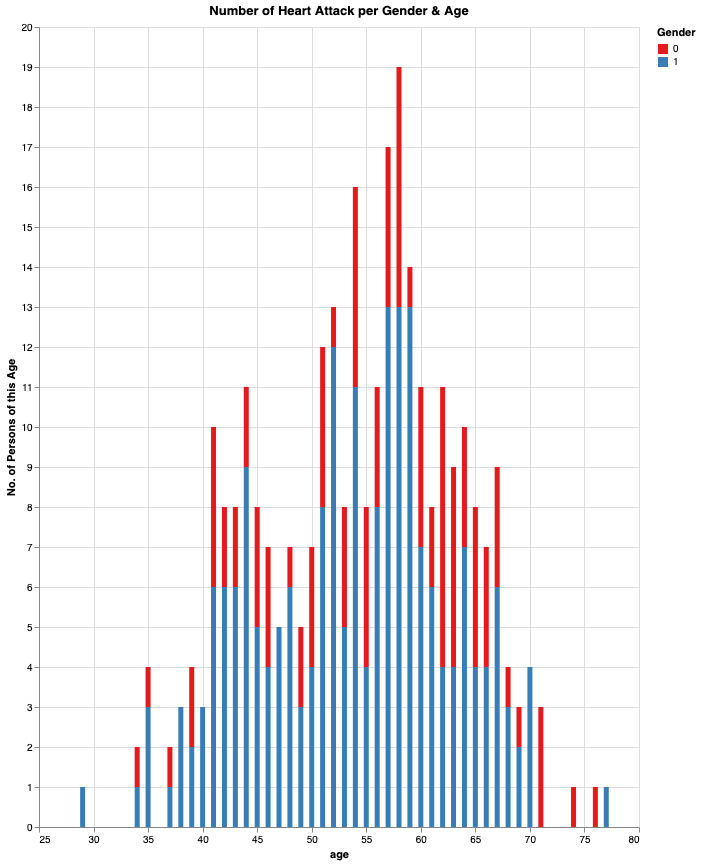

In [11]:
# Exploratory Interactive Graph to see the relationship between age, gender, and health metrics

fig1 = ( 
    alt.Chart(awake_df)
    .mark_bar()
    .encode(
        alt.X("age"),
        alt.Y("count()", title ="No. of Persons of this Age"),
        alt.Color("sex:N", scale=alt.Scale(scheme="set1"), title="Gender"
        ),
        tooltip=[
            "chest_pain:Q",
            "Rblood_pressure:Q",
            "cholesterol:Q",
            "Fblood_sugar:Q",
            "Rest_ECG:Q",
            "Max_heart_rate:Q",
            "Blood_oxygen:Q",
            "Heart_attack:N"
        ],
    )
    .properties(title="Number of Heart Attack per Gender & Age", width=600, height=800)
)
fig1

From the above visualization, we learn that the age group 58 is most represented by 19 persons, and the age groups 73 to 80 and 25 to 30 are the least represented, having only one person each. 

Additional consultation is necessary to interpret the binary representation of gender. With that information, the visualization readily displays the relationship among:
- `gender`
- `age` 
- `Rblood_pressure`
- `cholesterol`
- `Fblood_sugar`
- `Rest_ECG`
- `Max_heart_rate`
- `Blood_oxygen`
- `Heart_attack`

It does so through an interactive tooltip feature that is activated upon scrolling over the bars.

## Additional Visualization - Categorical vs Quantitative Features

From our dataset we know that some of the features are categorical and some are numerical. Below we will make a list of the numerical columns.

In [12]:
# Make a list of all the numeric columns
numeric_cols = (
    awake_df[["age", "Rblood_pressure","cholesterol", "Max_heart_rate", "Blood_oxygen", "major_vessels", "oldpeak"]].columns.tolist()
)
numeric_cols

['age',
 'Rblood_pressure',
 'cholesterol',
 'Max_heart_rate',
 'Blood_oxygen',
 'major_vessels',
 'oldpeak']

## Visualizing Quantitative Features

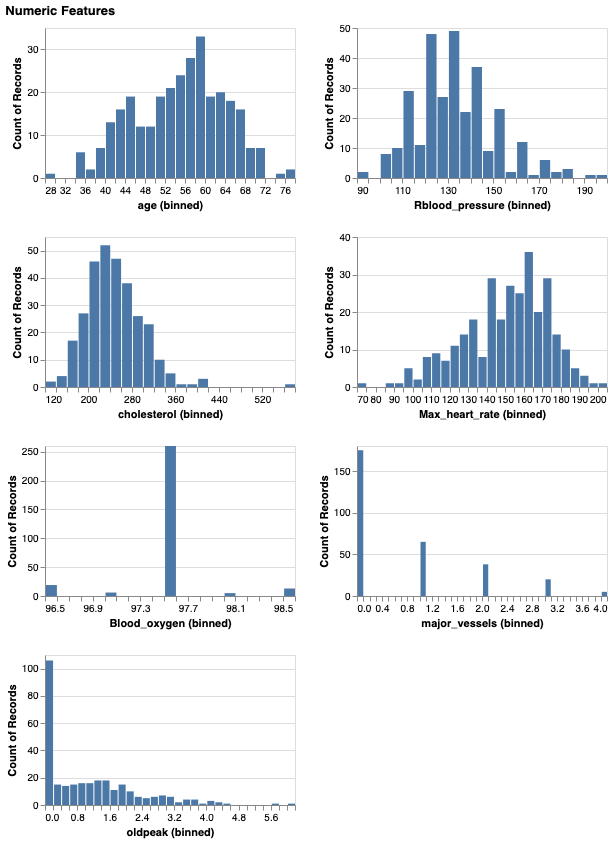

In [13]:
# Plot the numeric columns

numeric_plot = (
    alt.Chart(awake_df)
    .mark_bar()
    .encode(
        alt.X(alt.repeat(), type="quantitative", bin=alt.Bin(maxbins=40)),
        alt.Y("count()"),
    )
    .properties(width=250, height=150)
    .repeat(numeric_cols, columns=2, title = "Numeric Features")
)
numeric_plot

The above figure highlights the amount of records in each of the following quantitatve features:
- `age`
- `Rblood_pressure`
- `cholesterol'
- `Max_heart_rate`
- `Blood_oxygen`
- `major_vessels`
- `oldpeak`

## Correlation among Quantitative Features
Below, we look at the correlation among our quantitative features, pointed out above.

To begin, we make a new dataframe with all our quantitative features.

In [14]:
# Make a dataframe with the numeric columns to use in a correlation plot, and call it corr_df
corr_df = (
    awake_df[numeric_cols].corr("pearson").stack().reset_index(name="correlation")
)
corr_df.head()

,level_0,level_1,correlation
0,age,age,1.000000
1,age,Rblood_pressure,0.279351
2,age,cholesterol,0.213678
3,age,Max_heart_rate,-0.398522
4,age,Blood_oxygen,-0.002252


Now, we plot our correlation.

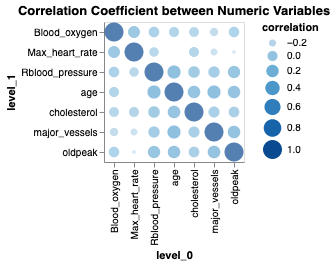

In [15]:
# make a correlation plot
cc_plot = (
    alt.Chart(corr_df)
    .mark_circle()
    .encode(
        alt.X("level_0:N"),
        alt.Y("level_1:N"),
        alt.Size("correlation"),
        alt.Color("correlation")
    )
    .properties(title="Correlation Coefficient between Numeric Variables")
)
cc_plot

From the above correlation plot, we see that `Max_heart_rate` is mostly correlated to `Blood_oxygen`, `age` is noticeably strongly correlated to several features: `cholesterol`, `major_vessels`, `Rblood_pressure`, and `oldpeak`. And surprisingly that there are no correlations between `age` and `Max_heart_rate`.

# Modeling: Predicting Heart Attacks
Let's see if our features can sufficiently predict heart attack.

We begin by splitting our dataset.

In [16]:
# To adhere to the Golden Rule, let's now split our dataset before anything else.
train_df, test_df = train_test_split(awake_df, test_size=0.2, random_state=77)
train_df.head()

,age,sex,chest_pain,Rblood_pressure,cholesterol,Fblood_sugar,Rest_ECG,Max_heart_rate,exercize_angina,oldpeak,slope,major_vessels,TStress_result,Heart_attack,Blood_oxygen
282,59.0,1.0,2.0,126.0,218.0,1.0,1.0,134.0,0.0,2.2,1.0,1.0,1.0,0.0,96.5
159,56.0,1.0,1.0,130.0,221.0,0.0,0.0,163.0,0.0,0.0,2.0,0.0,3.0,1.0,97.5
46,44.0,1.0,2.0,140.0,235.0,0.0,0.0,180.0,0.0,0.0,2.0,0.0,2.0,1.0,97.0
164,38.0,1.0,2.0,138.0,175.0,0.0,1.0,173.0,0.0,0.0,2.0,4.0,2.0,1.0,97.5
244,56.0,1.0,0.0,132.0,184.0,0.0,0.0,105.0,1.0,2.1,1.0,1.0,1.0,0.0,97.5


Find the distribution of our target values in `Heart_attack`.


In [17]:
class_dist = train_df.value_counts('Heart_attack')
class_dist

Heart_attack
1.0    131
0.0    111
dtype: int64

There are 131 heart attacks of the category 1 and 111 of the category 0. This means the classes are unbalanced, which is not unsual.

## Before Preprocessing

Before preprocessing, let's separate the feature vectors from the target feature, `Heart_attack`.

In [18]:
# Separate feature vectors from the target, Heart_attack.
X_train = train_df.drop(columns=["Heart_attack"])
y_train= train_df["Heart_attack"]

X_test = test_df.drop(columns=["Heart_attack"])
y_test = test_df["Heart_attack"]
X_train.head()

,age,sex,chest_pain,Rblood_pressure,cholesterol,Fblood_sugar,Rest_ECG,Max_heart_rate,exercize_angina,oldpeak,slope,major_vessels,TStress_result,Blood_oxygen
282,59.0,1.0,2.0,126.0,218.0,1.0,1.0,134.0,0.0,2.2,1.0,1.0,1.0,96.5
159,56.0,1.0,1.0,130.0,221.0,0.0,0.0,163.0,0.0,0.0,2.0,0.0,3.0,97.5
46,44.0,1.0,2.0,140.0,235.0,0.0,0.0,180.0,0.0,0.0,2.0,0.0,2.0,97.0
164,38.0,1.0,2.0,138.0,175.0,0.0,1.0,173.0,0.0,0.0,2.0,4.0,2.0,97.5
244,56.0,1.0,0.0,132.0,184.0,0.0,0.0,105.0,1.0,2.1,1.0,1.0,1.0,97.5


Now, let's build a base model for comparison with our random forest model.

## Build Base Model with which to Compare Models

In [19]:
# Save our base model as dummy.
dummy = DummyClassifier(strategy='most_frequent')

# Use dummy to fit on the training set.
dummy.fit(X_train, y_train)

# Cross validate and save the results as a dataframe in the object dummy_scores. Be sure to return the train score.
dummy_scores = pd.DataFrame(cross_validate(dummy, X_train, y_train, cv=5, return_train_score=True))
dummy_scores

,fit_time,score_time,test_score,train_score
0,0.001107,0.000667,0.530612,0.544041
1,0.000562,0.000180,0.551020,0.538860
2,0.000481,0.000173,0.541667,0.541237
3,0.000454,0.000157,0.541667,0.541237
4,0.000471,0.000167,0.541667,0.541237


Find the mean of the results in dummy_scores.

In [20]:
# Find the mean of each column in dummy_scores, and save object as dummy_mean.
dummy_mean = dummy_scores.mean()
dummy_mean

fit_time       0.000615
score_time     0.000269
test_score     0.541327
train_score    0.541323
dtype: float64

Now, let's preprocess our data and build a pipeline.

## Preprocessing the Data and Pipeline Building

In order to preprocess, first separate the features into their types (binary, ordinal etc.).

In [21]:
# let's check the dtypes in order to separate them
X_train.dtypes

age                 float64
sex                category
chest_pain         category
Rblood_pressure     float64
cholesterol         float64
Fblood_sugar       category
Rest_ECG           category
Max_heart_rate      float64
exercize_angina    category
oldpeak             float64
slope              category
major_vessels       float64
TStress_result     category
Blood_oxygen        float64
dtype: object

In [22]:
# Separate columns into feature types.
numeric_features = ["age", "Rblood_pressure","cholesterol", "Max_heart_rate", "Blood_oxygen", "major_vessels", "oldpeak"]
categorical_features = ["sex", "chest_pain", "Fblood_sugar", "Rest_ECG", "exercize_angina", "slope", "TStress_result"]
binary_features = ["sex", "Fblood_sugar", "exercize_angina" ]
target = ["Heart_attack"]

We have no missing values, and so no need to impute values.

In [23]:
# Make a pipeline for each of the four feature types.
numeric_transformer = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

preprocessor = make_column_transformer(
                                      (numeric_transformer, numeric_features)
                                      
                                      )

## Build Models with which to Compare Base Model

In [24]:
# Use RandomForestClassifier to build a pipe, rfc_pipe.
rfc_pipe = make_pipeline(preprocessor, RandomForestClassifier(class_weight ="balanced", random_state=77, n_estimators=10))
#rfc_pipe

In [25]:
# Fit rfc_pipe on the training set.
rfc_pipe.fit(X_train, y_train)

# Cross validate on the training using rfc_pipe. Save the results in a DataFrame.
rfc_scores =pd.DataFrame(cross_validate(rfc_pipe, X_train, y_train, cv=5, return_train_score=True))
rfc_scores

,fit_time,score_time,test_score,train_score
0,0.012216,0.002362,0.714286,0.994819
1,0.011319,0.002203,0.775510,0.994819
2,0.010783,0.002267,0.750000,0.989691
3,0.011815,0.002348,0.625000,0.979381
4,0.010849,0.002166,0.645833,0.989691


Find the mean of rfc_scores.

In [26]:
rfc_mean_scores = rfc_scores.mean()
rfc_mean_scores

fit_time       0.011396
score_time     0.002269
test_score     0.702126
train_score    0.989680
dtype: float64

In comparisson to the DummyClassifier, the scores from RandomClassifier are noticeably higher.

Let's tune the hyperparameters n_estimators and max_depth. For speed, **RandomizedSearchCV** is used below and not **GridSearchCV**.

In [27]:
import scipy
from scipy.stats import randint

rf_pipeline = make_pipeline(
    preprocessor, RandomForestClassifier(random_state=123)
)

param_dist = {
    "randomforestclassifier__n_estimators": scipy.stats.randint(low=10, high=300),
    "randomforestclassifier__max_depth": scipy.stats.randint(low=2, high=20),
}

random_search = RandomizedSearchCV(
    rf_pipeline,
    param_dist,
    n_iter=50,
    cv=3,
    verbose=1,
    n_jobs=-1,
    scoring="accuracy",
    random_state=123,
)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['age',
                                                                                'Rblood_pressure',
                                                                                'cholesterol',
                                                             

In [28]:
# Calculate the best hyperparameter value for n_estimator and max_depth, and save as optimal_parameters.
optimal_parameters = random_search.best_params_

# Calculate the corresponding validation score, and save as optimal_score.
optimal_score = random_search.best_score_

optimal_parameters, optimal_score

({'randomforestclassifier__max_depth': 4,
  'randomforestclassifier__n_estimators': 86},
 0.7685699588477366)

In [29]:
pd.DataFrame(random_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.153351,0.032544,0.013952,0.005416,15,108,"{'randomforestclassifier__max_depth': 15, 'ran...",0.753086,0.740741,0.7250,0.739609,0.011494,36
1,0.041998,0.002173,0.007116,0.001811,8,27,"{'randomforestclassifier__max_depth': 8, 'rand...",0.728395,0.740741,0.7000,0.723045,0.017057,49
2,0.201551,0.015209,0.011816,0.003082,12,133,"{'randomforestclassifier__max_depth': 12, 'ran...",0.765432,0.765432,0.7125,0.747788,0.024952,22
3,0.143537,0.007215,0.008879,0.000916,3,106,"{'randomforestclassifier__max_depth': 3, 'rand...",0.827160,0.728395,0.7250,0.760185,0.047379,6
4,0.179847,0.007988,0.020186,0.002999,19,136,"{'randomforestclassifier__max_depth': 19, 'ran...",0.765432,0.753086,0.7250,0.747840,0.016918,19


## Score the model on the test set.

In [30]:
# Evaluate the best model from random_seach on the full training set.
training_score = random_search.score(X_train, y_train)
training_score

0.8760330578512396

In [31]:
# Evaluate the best model from random_seach on the full test set.
test_score = random_search.score(X_test, y_test)
test_score

0.819672131147541

/Users/nyandaredwood/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


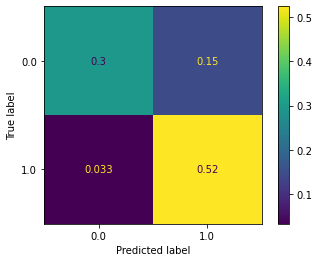

In [32]:
# Plot a confusion matrix on the test set using random_search 
cm_plot = plot_confusion_matrix(random_search, X_test, y_test, normalize="all")
cm_plot

The confusion matrix shows that we achieved predicting heart attacks for 52% of the time.

In [33]:
# Print a classification report on X_test of random_search's best model.
print(classification_report(y_test, random_search.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.90      0.67      0.77        27
         1.0       0.78      0.94      0.85        34

    accuracy                           0.82        61
   macro avg       0.84      0.80      0.81        61
weighted avg       0.83      0.82      0.81        61



The classification report helps us to understand that very little support is present (61 data points) which can affect the predictive model. For instance, 31 data points pertained to those who have heart attack, and 27 to those who do not. These are very small amounts of data points, a quantity which can hinder the model from learning sufficiently. 

The use of many more data points, such as in the thousands, can help to improve the predictive capability of the model. 

## Discussion: Placing Model in Production & Time Series

Above we have:
- developed and created a model in a training environment
- optimized and tested our code

These are the initial steps necessary to putting our model into production. Below are the following steps we would take to finalize putting our model into production:
- perform feature engineering
- clean and re-test our code for optimization
- Place the model into a container (containerization)
- Decide on a deployment method (Batch or online inference)
- Automate deployment and testing
- Monitor, continuously, the deployed model

### Challenges:
The above steps require additional decision making, which includes examining best practices online and consulting with my colleagues. One example of needed consultation with my colleagues pertains to the frequency with which my model will be receiving new data. This influences the choice between batch and online inference. If new data is being received in real time, then online inference will be chosen. If it is being recieved periodically and in delayed time then batch inference will be chosen.

Another challenge comprises the following hypothetical situation: if I were given 10 minutes of continuous ECG data for each patient in the dataset then I would want to examine the dataset in the context of time series analysis. My preferred language for doing this is R as I will be taking a heavier statistical approach to the analysis. This is a fundamental change to the approach outlined in this report.